## Problem Set 1
Group 1

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Simulated share price path')

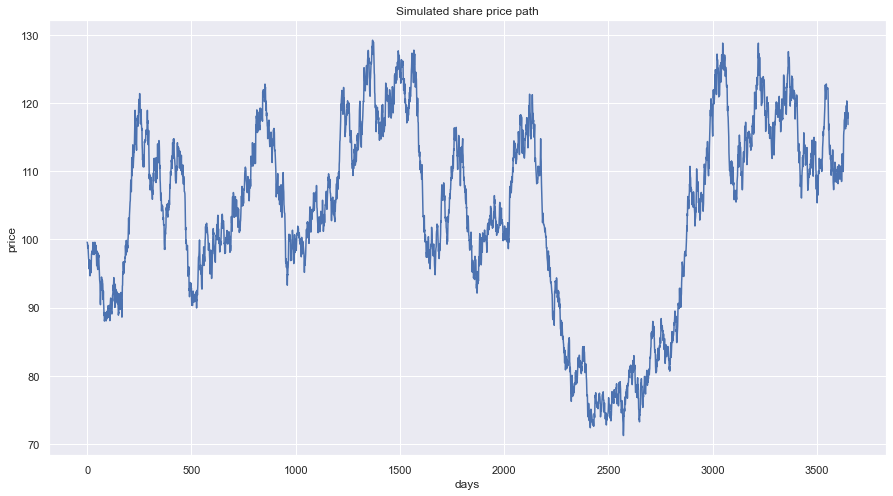

In [4]:

S0=100
mu=0.06
sigma=0.2
dt=1/365
T=3650
Z=np.random.standard_normal(T).cumsum()
t=np.arange(T)/365
S=S0*np.exp(mu*t-sigma**2*t/2+sigma*np.sqrt(dt)*Z)

## Presets for plot
sns.set(rc={'figure.figsize':(15,8)})

plt.plot(S)
plt.xlabel("days")
plt.ylabel("price")
plt.title('Simulated share price path')


Text(0.5, 1.0, 'Log returns')

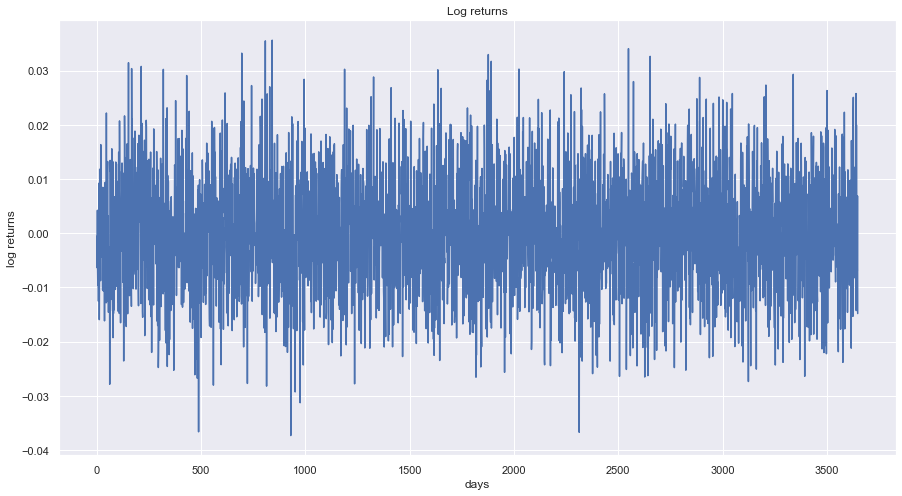

In [5]:
R=(S[1:]-S[:-1])/S[:-1];
r=np.log(1+R)
plt.plot(r)
plt.xlabel("days")
plt.ylabel("log returns")
plt.title('Log returns')

In [82]:
print(365*np.mean(r))
print(np.sqrt(365)*np.std(r))

0.13812135920166882
0.20340366438292495


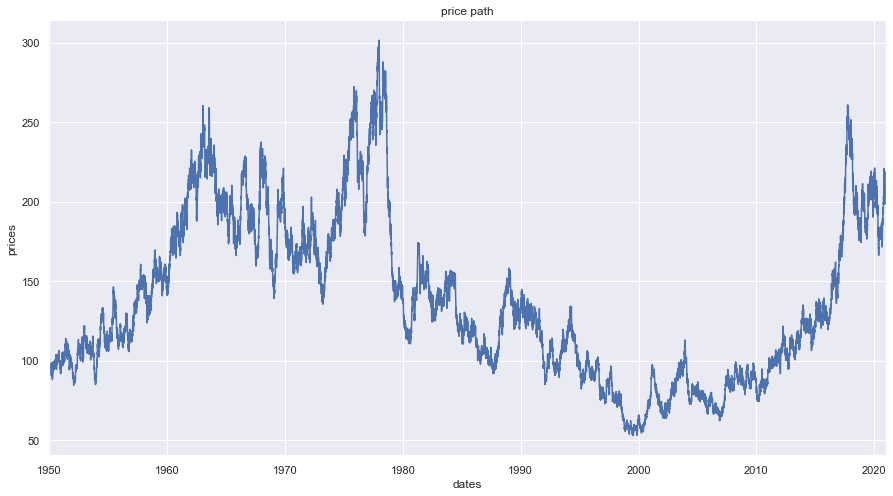

In [7]:
start='1950-01-01'
end='2020-12-31'
dates=pd.period_range(start,end,freq='D')
T=len(dates)
Z=np.random.standard_normal(T).cumsum()
t=np.arange(T)/365
S=S0*np.exp(mu*t-sigma**2*t/2+sigma*np.sqrt(dt)*Z)
prices=pd.Series(S,dates)

#plot
prices.plot()
plt.title(" daily price path")
plt.xlabel("dates")
plt.ylabel("prices")
plt.show()

In [88]:
print(len(dates))

25933


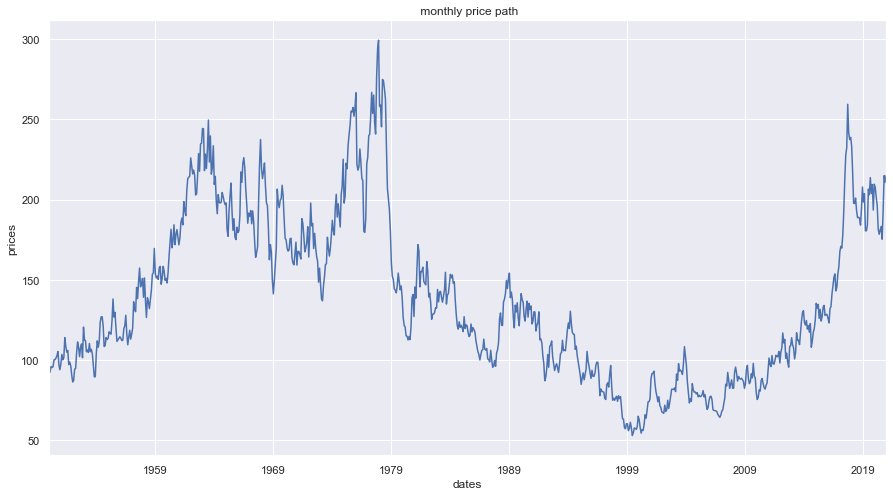

In [8]:
#monthly distribution
mon_prices=prices.resample('M').last()
mon_prices.plot()
plt.title(" monthly price path")
plt.xlabel("dates")
plt.ylabel("prices")
plt.show()

In [10]:
R_d=(prices.values[1:]-prices.values[:-1])/prices.values[:-1]
r_d=np.log(1+R_d)
r_d=pd.Series(r_d,prices.index[1:])
print(r_d.describe())

R_mon=(mon_prices.values[1:]-mon_prices.values[:-1])/mon_prices.values[:-1]
r_mon=np.log(1+R_mon)
r_mon=pd.Series(r_mon,mon_prices.index[1:])
print(r_mon.describe())

w_prices=prices.resample('W').last()
R_w=(w_prices.values[1:]-w_prices.values[:-1])/w_prices.values[:-1]
r_w=np.log(1+R_w)
r_w=pd.Series(r_w,w_prices.index[1:])
print(r_w.describe())



count    25932.000000
mean         0.000029
std          0.010490
min         -0.043876
25%         -0.007167
50%         -0.000003
75%          0.007153
max          0.036623
dtype: float64
count    851.000000
mean       0.000967
std        0.056788
min       -0.182955
25%       -0.037263
50%        0.001100
75%        0.038338
max        0.195918
dtype: float64
count    3705.000000
mean        0.000204
std         0.027724
min        -0.103074
25%        -0.018321
50%         0.000456
75%         0.018250
max         0.101210
dtype: float64


In [11]:
ann_mean_d=r_d.mean()*365
ann_std_d=r_d.std()*np.sqrt(365)
print(ann_mean_d)
print(ann_std_d)

ann_mean_m=r_mon.mean()*12
ann_std_m=r_mon.std()*np.sqrt(12)
print(ann_mean_m)
print(ann_std_m)

ann_mean_w=r_w.mean()*52
ann_std_w=r_w.std()*np.sqrt(52)
print(ann_mean_w)
print(ann_std_w)



0.010613410689396485
0.2004041962094527
0.011607248808341884
0.19671775479005393
0.010583108521891151
0.199921172625479


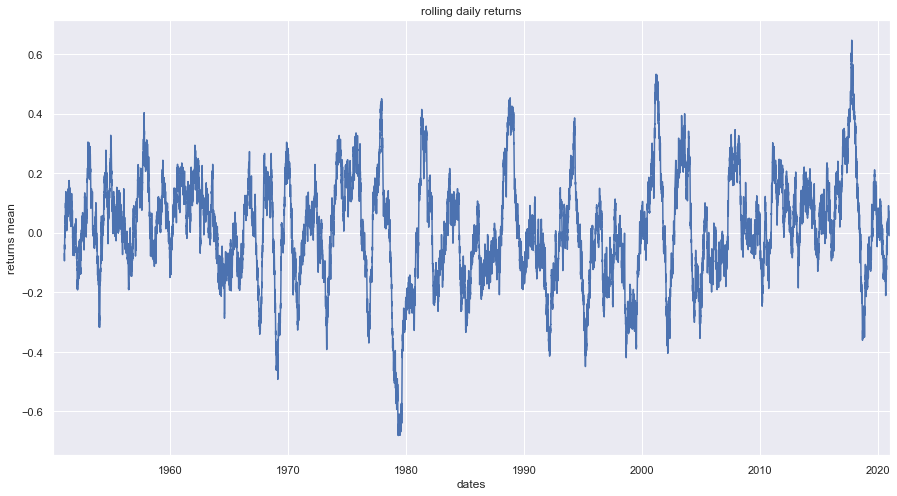

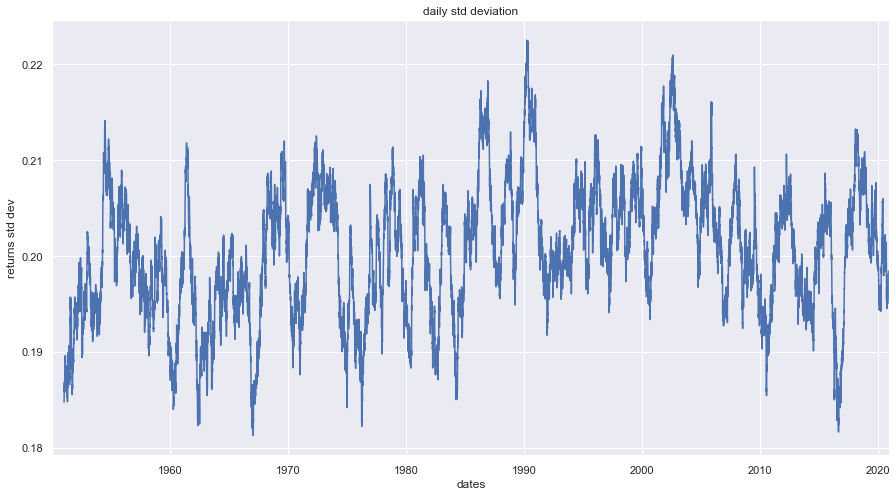

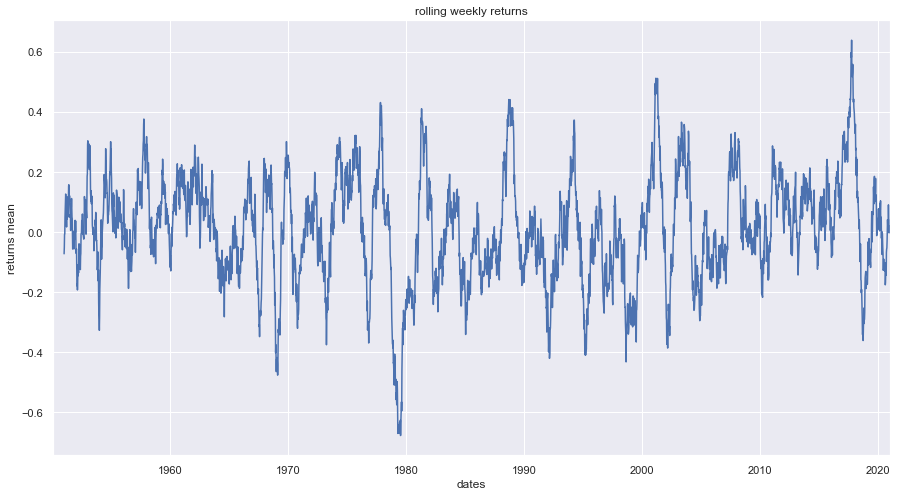

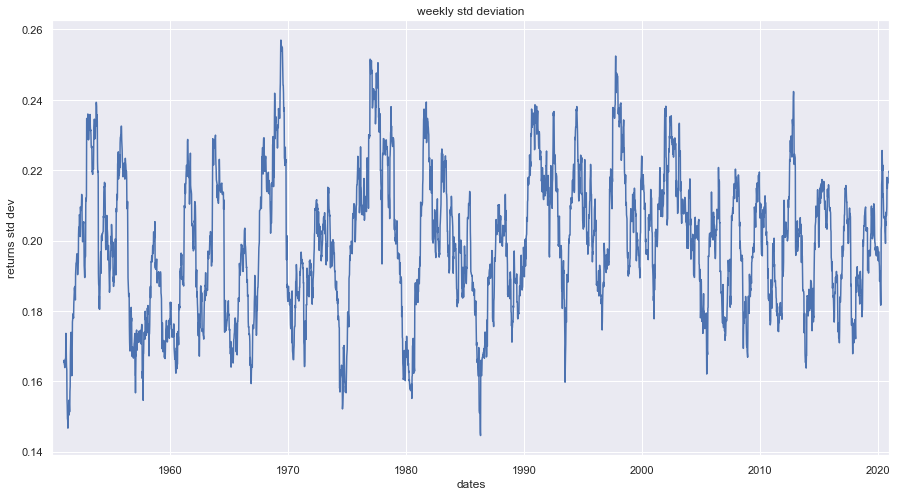

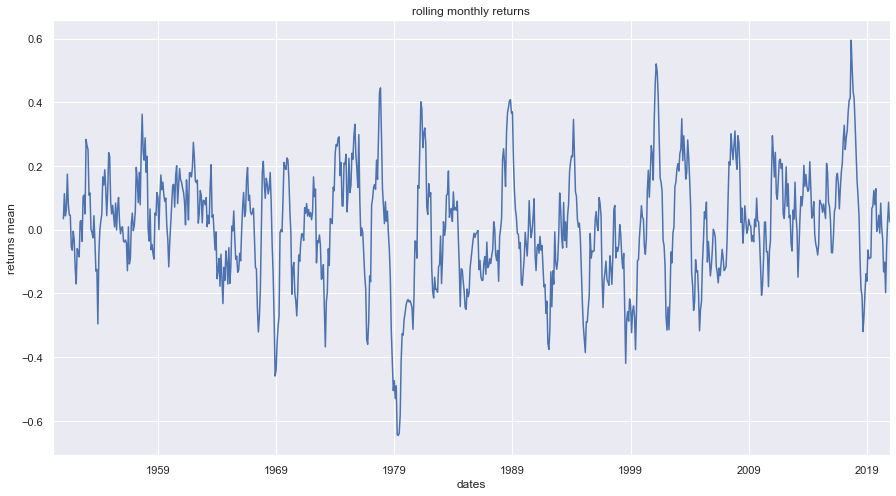

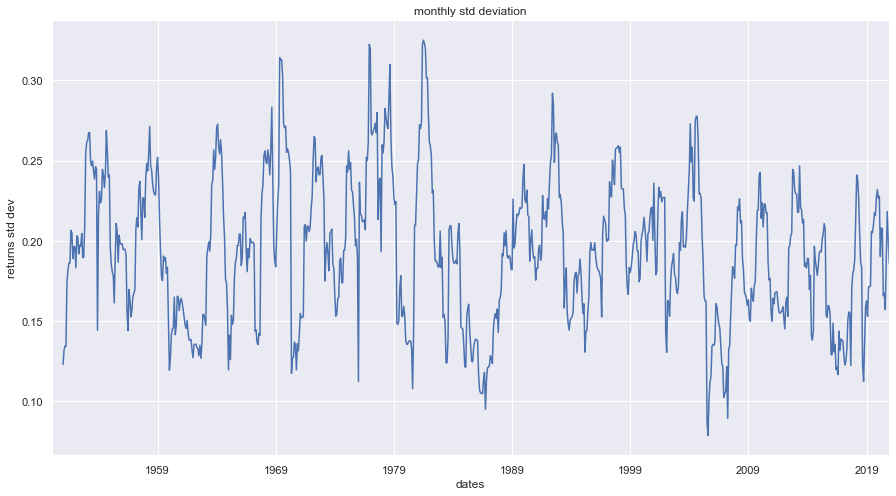

In [15]:
one_y_mean_d=r_d.rolling(365).mean()*365
one_y_std_d=r_d.rolling(365).std()*np.sqrt(365)
one_y_mean_d.plot()
plt.title("rolling daily returns")
plt.xlabel("dates")
plt.ylabel("returns mean")
plt.show()
one_y_std_d.plot()
plt.title("daily std deviation")
plt.xlabel("dates")
plt.ylabel("returns std dev")
plt.show()

one_y_mean_w=r_w.rolling(52).mean()*52
one_y_std_w=r_w.rolling(52).std()*np.sqrt(52)
one_y_mean_w.plot()
plt.title("rolling weekly returns")
plt.xlabel("dates")
plt.ylabel("returns mean")
plt.show()
one_y_std_w.plot()
plt.title("weekly std deviation")
plt.xlabel("dates")
plt.ylabel("returns std dev")
plt.show()

one_y_mean_m=r_mon.rolling(12).mean()*12
one_y_std_m=r_mon.rolling(12).std()*np.sqrt(12)
one_y_mean_m.plot()
plt.title("rolling monthly returns")
plt.xlabel("dates")
plt.ylabel("returns mean")
plt.show()
one_y_std_m.plot()
plt.title("monthly std deviation")
plt.xlabel("dates")
plt.ylabel("returns std dev")
plt.show()

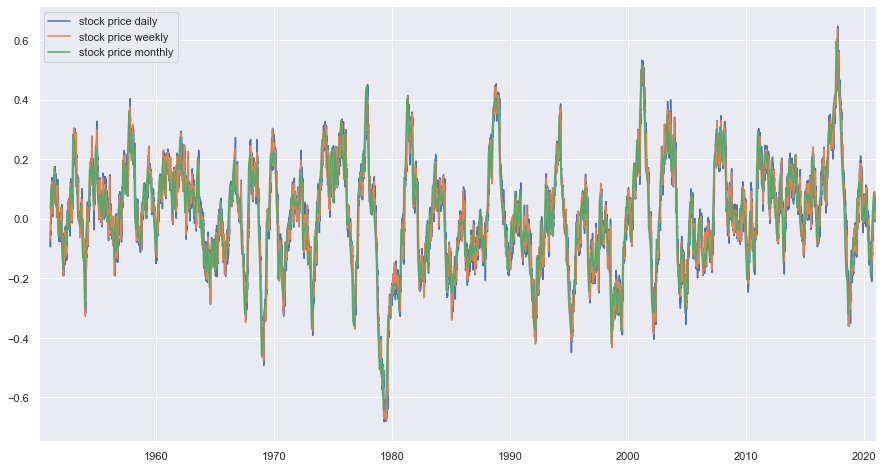

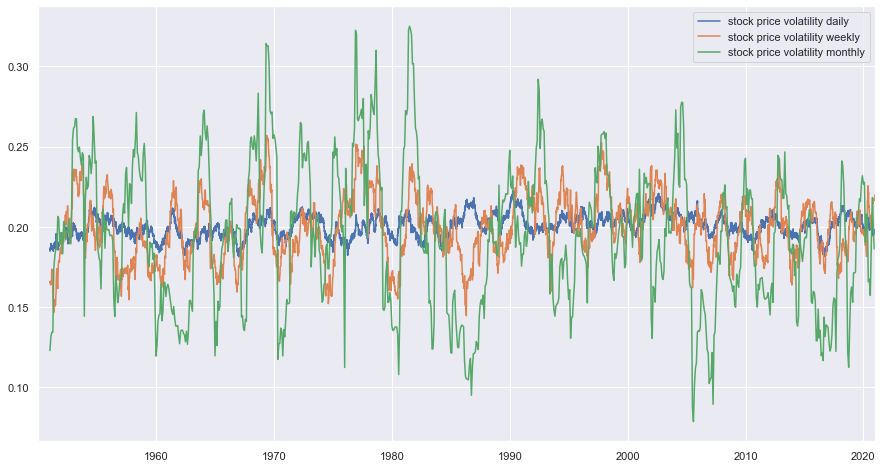

In [16]:
#comparison among mean
one_y_mean_d.plot(label='stock price daily')
one_y_mean_w.plot(label="stock price weekly")
one_y_mean_m.plot(label="stock price monthly")
plt.legend()
plt.show()

#plot the series avg
one_y_std_d.plot(label='stock price volatility daily')
one_y_std_w.plot(label="stock price volatility weekly")
one_y_std_m.plot(label="stock price volatility monthly")
plt.legend()
plt.show()

In [101]:
ts_ann_mean=r_d.resample('Y').mean()*365
squared_r_d=np.square(r_d)
ts_ann_var=r_d.resample('Y').mean()*365
ts_ann_mean.mean()
ts_ann_mean.var()
ts_ann_var.mean()
ts_ann_var.var()

ts_ann_mean_m=r_mon.resample('Y').mean()*12
squared_r_mon=np.square(r_mon)
ts_ann_var_m=r_mon.resample('Y').mean()*12
ts_ann_mean_m.mean()
ts_ann_mean_m.var()
ts_ann_var_m.mean()
ts_ann_var_m.var()





0.0003344183077420207

In [17]:
import wrds 
import psycopg2
db=wrds.Connection(wrds_username='sansonet')

Loading library list...
Done


In [18]:
df=db.raw_sql("select date, ret from crsp.dsf where permco in (7,35048,8048,21446,20792) and date>='2001-01-01' and date<='2020-12-31'")
df

,date,ret
0,2001-01-02,0.000000
1,2001-01-03,0.100840
2,2001-01-04,0.041985
3,2001-01-05,-0.040293
4,2001-01-08,0.011450
...,...,...
25155,2020-12-24,-0.001131
25156,2020-12-28,0.013390
25157,2020-12-29,-0.006086
25158,2020-12-30,0.005581


In [19]:
df.to_csv('HDF5.csv')


In [20]:
HDF5=pd.read_csv('HDF5.csv',index_col='date')

In [21]:
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2020-12-31'")
aapl=aapl.rename(index=aapl["date"], columns={"ret": "AAPL"})
gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2020-12-31'")
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})
msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2020-12-31'")
msft=msft.rename(index=msft["date"], columns={"ret": "MSFT"})
pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2020-12-31'")
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})
ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2020-12-31'")
ge=ge.rename(index=ge["date"], columns={"ret": "GE"})


In [22]:
data=pd.merge(aapl,gs,on="date")
data=pd.merge(data,msft,on="date")
data=pd.merge(data,pg,on="date")
data=pd.merge(data,ge,on="date")
data.set_index("date",inplace=True)
data.index=pd.to_datetime(data.index,format="%Y-%m-%d")
logd=np.log(1+data)
logm=logd.resample('M').sum()
logw=logd.resample('W').sum()

In [23]:
logd.describe()

,AAPL,GS,MSFT,PG,GE
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000
mean,0.001264,0.000227,0.000552,0.000360,-0.000174
std,0.023160,0.022636,0.018260,0.011855,0.021047
min,-0.197470,-0.210223,-0.159453,-0.091428,-0.164394
25%,-0.009671,-0.009845,-0.007782,-0.005020,-0.008503
50%,0.000949,0.000338,0.000380,0.000373,0.000000
75%,0.012613,0.010664,0.008922,0.005958,0.008369
max,0.130194,0.234818,0.170626,0.113409,0.179844


In [24]:
logw.describe()

,AAPL,GS,MSFT,PG,GE
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.006093,0.001093,0.002660,0.001733,-0.000840
std,0.048623,0.047955,0.036033,0.024282,0.044965
min,-0.278471,-0.365644,-0.202276,-0.175977,-0.228878
25%,-0.021377,-0.022739,-0.015774,-0.009632,-0.019232
50%,0.007991,0.003369,0.002402,0.002299,-0.000332
75%,0.034839,0.025474,0.021760,0.014667,0.020817
max,0.236207,0.393197,0.149357,0.122933,0.309399


In [25]:
logm.describe()

,AAPL,GS,MSFT,PG,GE
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.026506,0.004755,0.011572,0.007539,-0.003653
std,0.104228,0.086716,0.071370,0.042712,0.087544
min,-0.399818,-0.321603,-0.178358,-0.123464,-0.324090
25%,-0.032266,-0.050857,-0.035418,-0.018831,-0.045241
50%,0.041959,0.015309,0.019096,0.009014,-0.004021
75%,0.093735,0.056736,0.053374,0.034200,0.043124
max,0.374168,0.210329,0.342015,0.112685,0.316246


In [26]:
ann_meand=logd.mean()*252
#using number of trading days in a year
ann_meand

AAPL    0.318583
GS      0.057156
MSFT    0.139083
PG      0.090608
GE     -0.043903
dtype: float64

In [27]:
ann_meanw=logw.mean()*52
ann_meanw

AAPL    0.316859
GS      0.056847
MSFT    0.138331
PG      0.090117
GE     -0.043665
dtype: float64

In [28]:
ann_meanm=logm.mean()*12
ann_meanm

AAPL    0.318078
GS      0.057066
MSFT    0.138863
PG      0.090464
GE     -0.043833
dtype: float64

In [29]:
ann_stdd=logd.std()*np.sqrt(252)
ann_stdd

AAPL    0.367651
GS      0.359328
MSFT    0.289865
PG      0.188197
GE      0.334105
dtype: float64

In [30]:
ann_stdw=logw.std()*np.sqrt(52)
ann_stdw

AAPL    0.350626
GS      0.345806
MSFT    0.259841
PG      0.175102
GE      0.324248
dtype: float64

In [31]:
ann_stdm=logm.std()*np.sqrt(12)
ann_stdm

AAPL    0.361058
GS      0.300392
MSFT    0.247232
PG      0.147960
GE      0.303260
dtype: float64

<Figure size 1080x576 with 0 Axes>

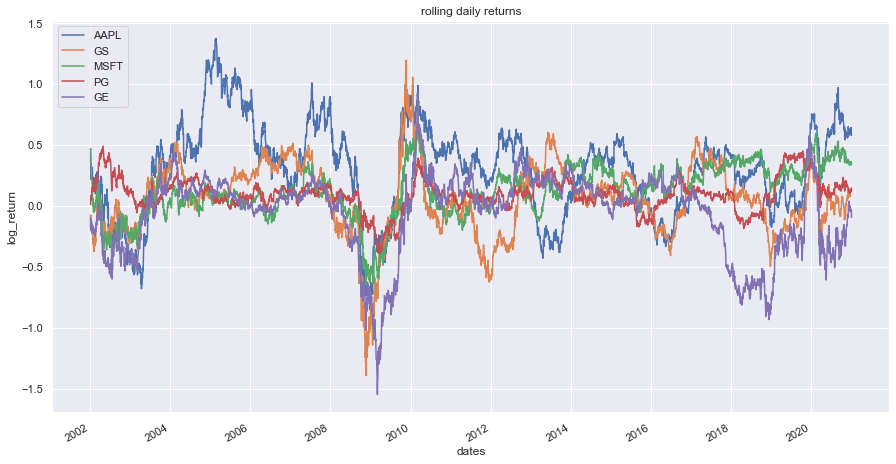

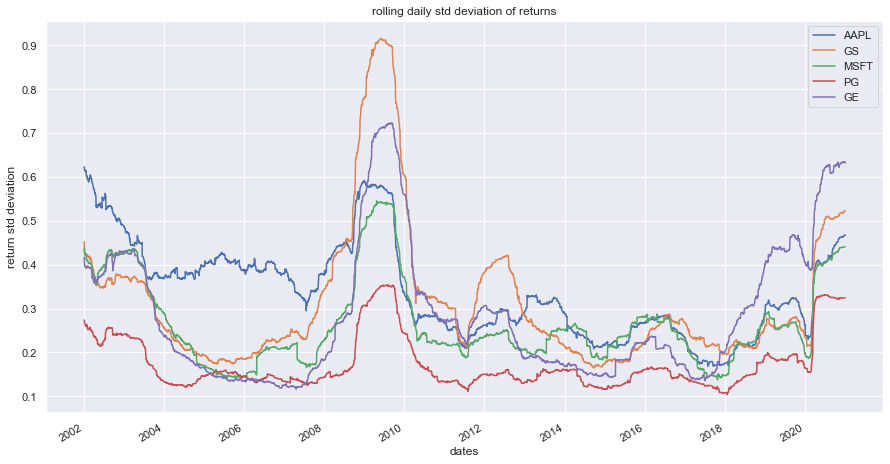

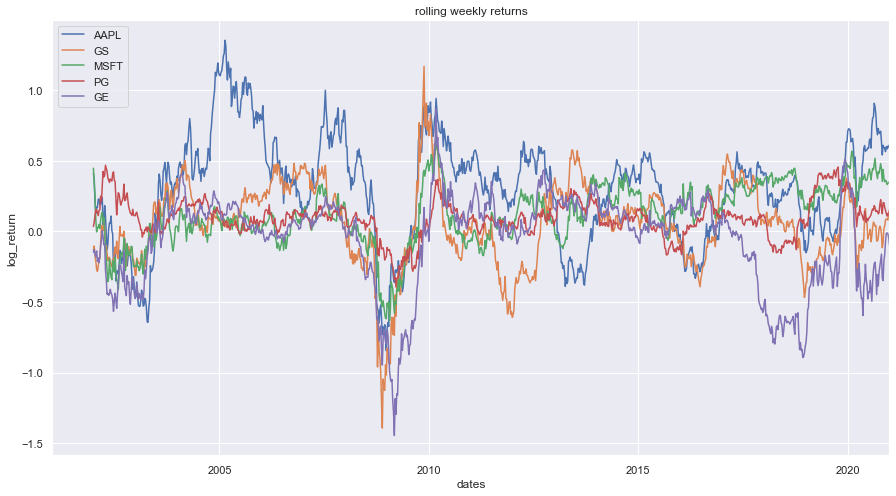

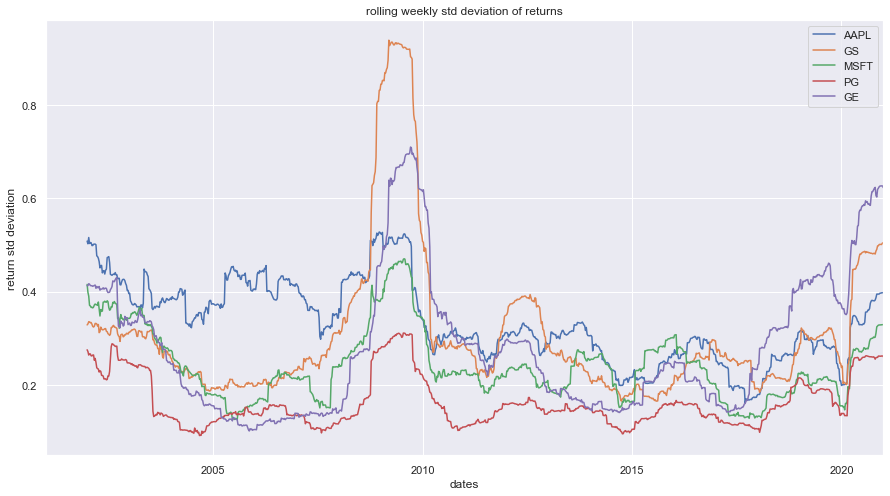

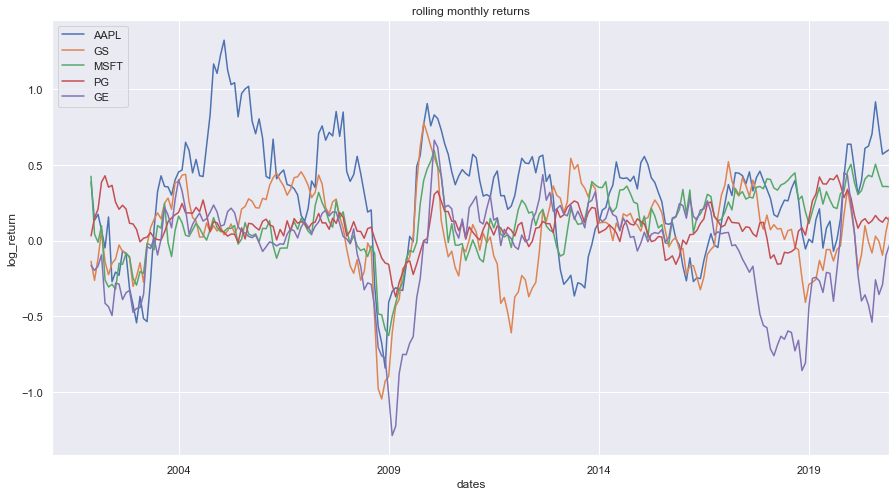

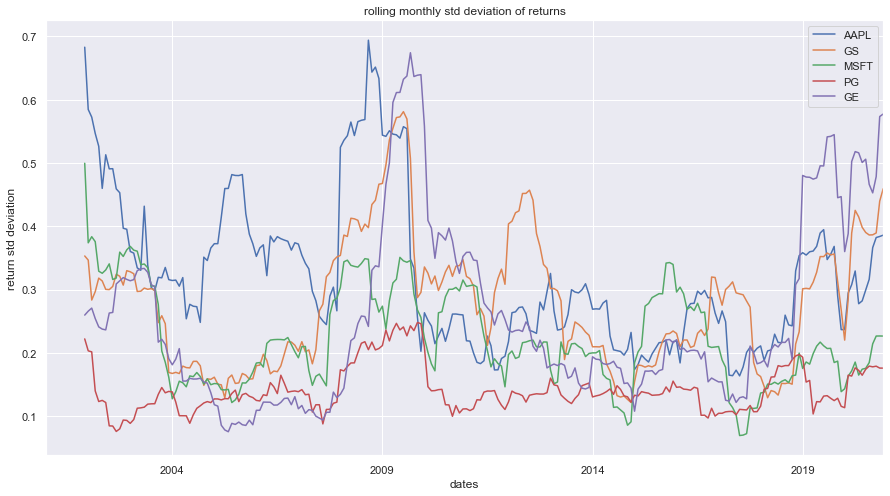

In [36]:
oney_mean_d=logd.rolling(252).mean()*252
oney_std_d=logd.rolling(252).std()*np.sqrt(252)
plt.figure()
oney_mean_d.plot()
plt.title("rolling daily returns")
plt.xlabel("dates")
plt.ylabel("log_return")
plt.show()
oney_std_d.plot()
plt.title("rolling daily std deviation of returns")
plt.xlabel("dates")
plt.ylabel("return std deviation")
plt.show()

oney_mean_w=logw.rolling(52).mean()*52
oney_std_w=logw.rolling(52).std()*np.sqrt(52)
oney_mean_w.plot()
plt.title("rolling weekly returns")
plt.xlabel("dates")
plt.ylabel("log_return")
plt.show()
oney_std_w.plot()
plt.title("rolling weekly std deviation of returns")
plt.xlabel("dates")
plt.ylabel("return std deviation")
plt.show()

oney_mean_m=logm.rolling(12).mean()*12
oney_std_m=logm.rolling(12).std()*np.sqrt(12)
oney_mean_m.plot()
plt.title("rolling monthly returns")
plt.xlabel("dates")
plt.ylabel("log_return")
plt.show()
oney_std_m.plot()
plt.title("rolling monthly std deviation of returns")
plt.xlabel("dates")
plt.ylabel("return std deviation")
plt.show()

In [37]:
a=0
for i in range (4,10):
  a = a + i
a
